<a href="https://colab.research.google.com/github/tkasod2/TIL/blob/main/zerobase/study/%EC%8B%A4%EC%A0%84_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_3_Statistical_Analysis%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%A7%88%EC%BC%80%ED%8C%85_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 불러오기

In [1]:
# library 불러오기
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# 데이터 mount 하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 살펴보기

* Cookie: Randomly generated customer id enabling us to tie subsequent visits back to the same customer
* Timestamp: Date and time when the visit took place
* Interaction: Categorical variable indicating the type of interaction that took place
* Conversion: Boolean variable indicating whether a conversion took place
* Conversion Value: Value of the potential conversion event
* Channel: The marketing channel that brought the customer to our site


In [3]:
# 경로 설정
# DRIVE_PATH = "/content/drive/MyDrive/" # 내 드라이브의 경로
# FILE_PATH_IN_MY_DRIVE = 'zerobase/part2_channel_attribution/project_3_stats/data/attribution_data.csv' # 내 드라이브 내 파일이 있는 경로
# PATH = DRIVE_PATH +  FILE_PATH_IN_MY_DRIVE
PATH = '/content/drive/MyDrive/[바로-써먹는-데이터-분석]-강의자료-new4/2부/Part 2. 효율좋은 마케팅 채널 좀 알려주세요! - 고객 유입 분석/Project_3_실전 프로젝트 3. Statistical Analysis를 활용한 마케팅 데이터 분석/data/attribution_data.csv'

df = pd.read_csv(PATH) # csv 파일 읽어오기
df.head(10) # 데이터 상위 5개 불러오기

# 데이터는 이미 시간 순으로 정렬되어 있음

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search
5,0000nACkD9nFkBBDECD3ki00E,2018-07-03T23:36:49Z,impression,0,0.0,Paid Search
6,0000nACkD9nFkBBDECD3ki00E,2018-07-10T22:24:41Z,impression,0,0.0,Paid Search
7,0000nACkD9nFkBBDECD3ki00E,2018-07-10T22:24:44Z,impression,0,0.0,Paid Search
8,0000nACkD9nFkBBDECD3ki00E,2018-07-11T21:21:46Z,impression,0,0.0,Paid Search
9,0000nACkD9nFkBBDECD3ki00E,2018-07-11T22:19:53Z,impression,0,0.0,Paid Search


In [4]:
df['interaction'].value_counts()

impression    569098
conversion     17639
Name: interaction, dtype: int64

In [5]:
df.interaction.drop_duplicates()

0     impression
22    conversion
Name: interaction, dtype: object

In [6]:
df.channel.drop_duplicates(keep='first')

0          Instagram
1     Online Display
4        Paid Search
18          Facebook
24      Online Video
Name: channel, dtype: object

In [7]:
df.iloc[80:100,:]

,cookie,time,interaction,conversion,conversion_value,channel
80,000fhi3BhoFoECEkCECkB7iDk,2018-07-04T09:28:23Z,impression,0,0.0,Paid Search
81,000fhi3BhoFoECEkCECkB7iDk,2018-07-04T09:30:09Z,impression,0,0.0,Paid Search
82,000fhi3BhoFoECEkCECkB7iDk,2018-07-09T13:14:23Z,impression,0,0.0,Paid Search
83,000h3n9nC0hFhE3CCnkkAof7n,2018-07-19T14:31:57Z,conversion,1,6.0,Facebook
84,000hBihC9o30A9fi7BhFDnhn0,2018-07-04T23:13:38Z,impression,0,0.0,Paid Search
85,000hBihC9o30A9fi7BhFDnhn0,2018-07-23T23:01:56Z,impression,0,0.0,Online Display
86,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-07T14:34:54Z,impression,0,0.0,Online Video
87,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-07T14:35:22Z,impression,0,0.0,Online Video
88,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-13T20:21:34Z,impression,0,0.0,Online Video
89,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-13T20:29:35Z,impression,0,0.0,Online Video


유저 (쿠키)별로 보통 몇 개의 채널에 노출되었는지 확인하기

In [8]:
# 유저 별 unique 채널 수 구하기
df_channels_per_cookie = df.groupby('cookie').channel.nunique().reset_index()
df_channels_per_cookie.head()

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,2
1,0000nACkD9nFkBBDECD3ki00E,1
2,0003EfE37E93D0BC03iBhBBhF,1
3,00073CFE3FoFCn70fBhB3kfon,1
4,00079hhBkDF3k3kDkiFi9EFAD,1


In [9]:
# 채널수 별 유저수(쿠키) 확인하기
df_channels_per_cookie.groupby('channel').count()

,cookie
channel,
1,183020
2,45964
3,9549
4,1473
5,102


## 도메인 지식을 활용한 채널 기여도 분석
- 도메인 지식을 활용한다 = 우리가 기존에 알고 있는, 또는 기존에 잘 알려진 방법론을 사용해본다
- 어떤 채널이 전환에 대한 기여도가 높았는지 살펴보자

### Last Interaction Attribution Model
- 마지막으로 노출/클릭한 채널의 기여도를 100%로 계산한다

In [10]:
df.loc[df.cookie == "00000FkCnDfDDf0iC97iC703B", :]

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display


In [11]:
# drop_duplicates() keep params 활용
df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'channel', 'conversion']]
print(len(df_last_interaction))
df_last_interaction.head(10)

240108


,cookie,channel,conversion
3,00000FkCnDfDDf0iC97iC703B,Online Display,0
9,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
14,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
20,0007iiAiFh3ifoo9Ehn3ABB0F,Instagram,0
21,0007o0nfoh9o79DDfD7DAiEnE,Facebook,0
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
28,000A9AfDohfiBAFB0FDf3kDEE,Online Video,0


In [12]:
df_last_interaction.loc[df_last_interaction.cookie == "00000FkCnDfDDf0iC97iC703B", :]

,cookie,channel,conversion
3,00000FkCnDfDDf0iC97iC703B,Online Display,0


In [13]:
# 전환이 된 경우 마지막으로 접한 채널이 무엇인지 가져오자!
df_last_interaction_conv = df_last_interaction.loc[df_last_interaction.conversion == 1,:]
print("전환수",len(df_last_interaction_conv))
df_last_interaction_conv.head()

전환수 17639


,cookie,channel,conversion
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
83,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
109,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,1
124,000kiDB3D0fCfDAohCDB3ohko,Facebook,1


In [14]:
last_interaction_attrib = (
    df_last_interaction_conv
    .groupby('channel')['cookie']
    .count()
    .reset_index()
    .rename(columns={"cookie": "attribution"})
)
last_interaction_attrib

,channel,attribution
0,Facebook,5301
1,Instagram,2244
2,Online Display,2139
3,Online Video,3408
4,Paid Search,4547


### First Interaction Attribution Model
- 고객이 상호작용한 첫 번째 채널이 전환 가치에 100% 기여했다고 간주함

In [15]:
# 유저가 처음으로 접한 채널을 골라내자
df_first_interaction = df.drop_duplicates('cookie', keep='first')[['cookie', 'channel', 'conversion']]
print(len(df_first_interaction))
df_first_interaction.head(10)

240108


,cookie,channel,conversion
0,00000FkCnDfDDf0iC97iC703B,Instagram,0
4,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
10,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
17,0007iiAiFh3ifoo9Ehn3ABB0F,Instagram,0
21,0007o0nfoh9o79DDfD7DAiEnE,Facebook,0
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
24,000A9AfDohfiBAFB0FDf3kDEE,Online Video,0


In [16]:
# 전환이 된 쿠키 아이디가 모여있는 데이터
print(len(df_last_interaction_conv))
df_last_interaction_conv.head(1)

17639


,cookie,channel,conversion
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1


In [17]:
# 전환 데이터와 merge 하자
df_first_interaction_conv = (
    df_first_interaction[['cookie', 'channel']]
      .merge(df_last_interaction_conv[['cookie', 'conversion']], 
             on='cookie')
)
df_first_interaction_conv.head()

print(len(df_first_interaction_conv))

17639


In [18]:
first_interaction_attrib = (
    df_first_interaction_conv
    .groupby('channel')['cookie']
    .count()
    .reset_index()
    .rename(columns={"cookie": "attribution"})
)
first_interaction_attrib

,channel,attribution
0,Facebook,5177
1,Instagram,2329
2,Online Display,2160
3,Online Video,3216
4,Paid Search,4757


### Linear Interaction Attribution Model
- 전환 경로에서 발생한 모든 채널의 기여도가 균등하다고 가정해보자
- 예를 들어 채널 1개에 노출되었다면 기여도 1, 2개에 노출되었다면 각 채널에 0.5, 0.5 씩 균등하게 배분하여 기여도를 계산한다.



먼저 유저 아이디 별로 중복되는 채널은 제거한다.

In [19]:
# 각 유저 별로 채널 별 데이터를 각 1벌씩 남긴다.
df_uniq_chl = df.drop_duplicates(['cookie', 'channel'], keep='last')[['cookie', 'channel']]
print(len(df_uniq_chl))
df_uniq_chl.head()

309997


,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,Instagram
3,00000FkCnDfDDf0iC97iC703B,Online Display
9,0000nACkD9nFkBBDECD3ki00E,Paid Search
14,0003EfE37E93D0BC03iBhBBhF,Paid Search
15,00073CFE3FoFCn70fBhB3kfon,Instagram


그 다음엔? 
- 유저 아이디 별 채널 수를 구한다 (나중에 기여도를 균등하게 나눌 때 이 값을 사용하자 :) )

In [20]:
df_uniq_chl_cnt = (
    df_uniq_chl
    .groupby('cookie')
    .count()
    .rename(columns = {"channel": "channel_cnt"})
    .reset_index()
)
df_uniq_chl_cnt.head()

,cookie,channel_cnt
0,00000FkCnDfDDf0iC97iC703B,2
1,0000nACkD9nFkBBDECD3ki00E,1
2,0003EfE37E93D0BC03iBhBBhF,1
3,00073CFE3FoFCn70fBhB3kfon,1
4,00079hhBkDF3k3kDkiFi9EFAD,1


앞에서 구한 두 테이블을 합쳐보자

In [21]:
df_uniq_chl_total = df_uniq_chl.merge(df_uniq_chl_cnt, on = 'cookie')
df_uniq_chl_total.head()

,cookie,channel,channel_cnt
0,00000FkCnDfDDf0iC97iC703B,Instagram,2
1,00000FkCnDfDDf0iC97iC703B,Online Display,2
2,0000nACkD9nFkBBDECD3ki00E,Paid Search,1
3,0003EfE37E93D0BC03iBhBBhF,Paid Search,1
4,00073CFE3FoFCn70fBhB3kfon,Instagram,1


전환된 유저들만 가져오자

In [22]:
# 전환 데이터와 merge 하자
df_linear_interaction_conv = (
    df_uniq_chl_total
      .merge(df_last_interaction_conv[['cookie', 'conversion']], 
             on='cookie')
)

In [23]:
len(df_linear_interaction_conv)

24716

In [24]:
# 전환(conversion)을 채널수로 나누자 
df_linear_interaction_conv.head()

,cookie,channel,channel_cnt,conversion
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1,1
1,00090n9EBBEkA000C7Cik999D,Facebook,1,1
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1,1
3,000hCBnCB7oi7ADAEnEBCnBEE,Instagram,2,1
4,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,2,1


In [25]:
# 둘다 int 인지 나누기 전에 확인 :) 
df_linear_interaction_conv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24716 entries, 0 to 24715
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cookie       24716 non-null  object
 1   channel      24716 non-null  object
 2   channel_cnt  24716 non-null  int64 
 3   conversion   24716 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 965.5+ KB


In [26]:
df_linear_interaction_conv['linear_attr'] = (
    df_linear_interaction_conv.conversion
            .divide(
                df_linear_interaction_conv.channel_cnt
            ) 
)


# df_linear_interaction_conv['linear_attr'] = \
# df_linear_interaction_conv['conversion']/df_linear_interaction_conv['channel_cnt']


In [27]:
df_linear_interaction_conv.head()

,cookie,channel,channel_cnt,conversion,linear_attr
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1,1,1.0
1,00090n9EBBEkA000C7Cik999D,Facebook,1,1,1.0
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1,1,1.0
3,000hCBnCB7oi7ADAEnEBCnBEE,Instagram,2,1,0.5
4,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,2,1,0.5


In [28]:
# 채널별 기여도의 합을 구해보자 
# 나누기를 하니까 소숫점으로 떨어진다 :) 

linear_interaction_attrib = (
    df_linear_interaction_conv
    .groupby('channel')['linear_attr']
    .sum()
    .reset_index()
    .rename(columns={"linear_attr": "attribution"})
)
linear_interaction_attrib

,channel,attribution
0,Facebook,4947.600000
1,Instagram,2627.100000
2,Online Display,2143.600000
3,Online Video,3192.183333
4,Paid Search,4728.516667


### 3가지 기여도 분석방법 비교하기

앞에서 우리가 만들어둔 3개의 기여도 모델을 비교해보자 :) 

데이터를 하나로 합친다

In [29]:
last_interaction_attrib["method"] = "last"
first_interaction_attrib["method"] = "first"
linear_interaction_attrib["method"] = "linear"

In [30]:
last_interaction_attrib

,channel,attribution,method
0,Facebook,5301,last
1,Instagram,2244,last
2,Online Display,2139,last
3,Online Video,3408,last
4,Paid Search,4547,last


In [31]:
linear_interaction_attrib

,channel,attribution,method
0,Facebook,4947.600000,linear
1,Instagram,2627.100000,linear
2,Online Display,2143.600000,linear
3,Online Video,3192.183333,linear
4,Paid Search,4728.516667,linear


In [32]:
total_data = (
    last_interaction_attrib
    .append(first_interaction_attrib, ignore_index=True)
    .append(linear_interaction_attrib, ignore_index=True)
)

total_data

,channel,attribution,method
0,Facebook,5301.000000,last
1,Instagram,2244.000000,last
2,Online Display,2139.000000,last
3,Online Video,3408.000000,last
4,Paid Search,4547.000000,last
5,Facebook,5177.000000,first
6,Instagram,2329.000000,first
7,Online Display,2160.000000,first
8,Online Video,3216.000000,first
9,Paid Search,4757.000000,first


그래프를 그려서 비교해보자

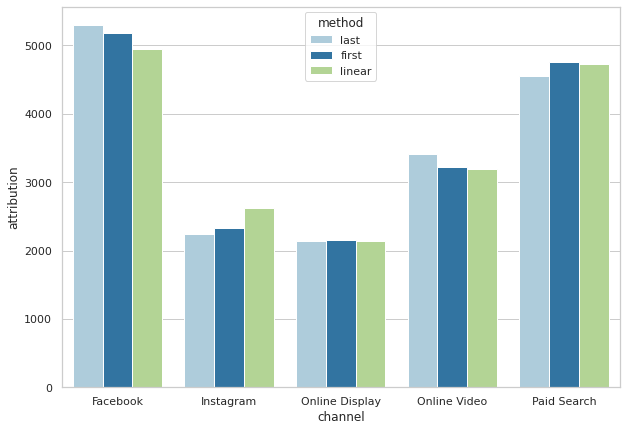

In [33]:
sns.set_theme(style="whitegrid", palette="Paired") # 테마를 설정한다
g = sns.barplot(x=total_data.channel, y=total_data.attribution, hue = total_data.method)
g.figure.set_size_inches(10, 7)

# Markov Chain 을 통한 채널 기여도 분석 1

- 유저가 여러 경로를 통해 제품을 접하고 구매를 할 때 통계적인 방법으로 기여도를 분배해보자


## 각 채널로 움직이는 전이 확률 (Transition Probability) 구하기

In [34]:
# 데이터 mount 하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# library 불러오기
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# data 불러오기
PATH = '/content/drive/MyDrive/[바로-써먹는-데이터-분석]-강의자료-new4/2부/Part 2. 효율좋은 마케팅 채널 좀 알려주세요! - 고객 유입 분석/Project_3_실전 프로젝트 3. Statistical Analysis를 활용한 마케팅 데이터 분석/data/attribution_data.csv'
df = pd.read_csv(PATH) # csv 파일 읽어오기
df.head(10) # 데이터 상위 5개 불러오기



,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search
5,0000nACkD9nFkBBDECD3ki00E,2018-07-03T23:36:49Z,impression,0,0.0,Paid Search
6,0000nACkD9nFkBBDECD3ki00E,2018-07-10T22:24:41Z,impression,0,0.0,Paid Search
7,0000nACkD9nFkBBDECD3ki00E,2018-07-10T22:24:44Z,impression,0,0.0,Paid Search
8,0000nACkD9nFkBBDECD3ki00E,2018-07-11T21:21:46Z,impression,0,0.0,Paid Search
9,0000nACkD9nFkBBDECD3ki00E,2018-07-11T22:19:53Z,impression,0,0.0,Paid Search


In [36]:
# 유저 별로 접한 채널을 모두 list 로 묶는다.
df_paths = (
    df.groupby('cookie')['channel']
      .agg(#<=> aggregate
          lambda x: x.unique().tolist()
      )
      .reset_index()  
)

In [37]:
df.channel.unique().tolist()

['Instagram', 'Online Display', 'Paid Search', 'Facebook', 'Online Video']

In [38]:
df_paths.head(10)

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]"
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search]
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search]
3,00073CFE3FoFCn70fBhB3kfon,[Instagram]
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search]
5,0007iiAiFh3ifoo9Ehn3ABB0F,"[Instagram, Facebook]"
6,0007o0nfoh9o79DDfD7DAiEnE,[Facebook]
7,0007oEBhnoF97AoEE3BCkFnhB,[Paid Search]
8,00090n9EBBEkA000C7Cik999D,[Facebook]
9,000A9AfDohfiBAFB0FDf3kDEE,[Online Video]


In [39]:
# 유저 별 전환 여부
# 각 유저 별 마지막 row 만 남기고 삭제한다.
# 나중에 이 conversion 컬럼을 앞에서 만든 채널 list 테이블에 붙인다.
df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'conversion']]
df_last_interaction.head(10)

,cookie,conversion
3,00000FkCnDfDDf0iC97iC703B,0
9,0000nACkD9nFkBBDECD3ki00E,0
14,0003EfE37E93D0BC03iBhBBhF,0
15,00073CFE3FoFCn70fBhB3kfon,0
16,00079hhBkDF3k3kDkiFi9EFAD,0
20,0007iiAiFh3ifoo9Ehn3ABB0F,0
21,0007o0nfoh9o79DDfD7DAiEnE,0
22,0007oEBhnoF97AoEE3BCkFnhB,1
23,00090n9EBBEkA000C7Cik999D,1
28,000A9AfDohfiBAFB0FDf3kDEE,0


In [40]:
# 기존에 만들어둔 path 데이터에 conversion 전환 여부를 합친다.
df_paths = pd.merge(df_paths, df_last_interaction, how='left', on='cookie')

In [41]:
df_paths.head()

,cookie,channel,conversion
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]",0
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search],0
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search],0
3,00073CFE3FoFCn70fBhB3kfon,[Instagram],0
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search],0


마코브 체인의 State 를 만들자

Markov Chain 의 State 종류
* Start: 첫 시작 
* Instagram: 인스타그램 광고
* Paid Search: 유료 검색 광고
* Facebook: 페이스북 광고
* Online Video: 비디오형 광고
* Online Display: 배너 노출 광고
* Conversion: 전환 성공 (구매 완료)
* Null: 전환 실패 (구매 없이 나감)


In [42]:
# 시작 State 를 추가한다.
# 최종 state 를 추가한다.
# 전환이 안되었다면 Null, 전환되었다면 Conversion State 를 캠페인 Path 뒤에 추가해준다. 
df_paths['paths'] = (
    df_paths
      .apply( 
          lambda x: ['Start'] + x.channel + ['Null'] 
            if x.conversion == 0 
            else ['Start'] + x.channel + ['Conversion'], 
          axis=1
      )
)

In [43]:
df_paths.head(10)

,cookie,channel,conversion,paths
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]",0,"[Start, Instagram, Online Display, Null]"
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search],0,"[Start, Paid Search, Null]"
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search],0,"[Start, Paid Search, Null]"
3,00073CFE3FoFCn70fBhB3kfon,[Instagram],0,"[Start, Instagram, Null]"
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search],0,"[Start, Paid Search, Null]"
5,0007iiAiFh3ifoo9Ehn3ABB0F,"[Instagram, Facebook]",0,"[Start, Instagram, Facebook, Null]"
6,0007o0nfoh9o79DDfD7DAiEnE,[Facebook],0,"[Start, Facebook, Null]"
7,0007oEBhnoF97AoEE3BCkFnhB,[Paid Search],1,"[Start, Paid Search, Conversion]"
8,00090n9EBBEkA000C7Cik999D,[Facebook],1,"[Start, Facebook, Conversion]"
9,000A9AfDohfiBAFB0FDf3kDEE,[Online Video],0,"[Start, Online Video, Null]"


In [44]:
# 총 쿠키수와 그 중 전환된 쿠키수 계산
cookie_count = len(df_paths)
conversion_count = len(df_paths.loc[df_paths.conversion == 1, :])
print(cookie_count)
print(conversion_count)

240108
17639


In [45]:
# 이 데이터의 전체 전환율 7% 정도이다.
base_conversion_rate = conversion_count / cookie_count
print(base_conversion_rate)

0.07346277508454528


In [46]:
# transition 확률을 구하기 위한 데이터
list_of_paths = df_paths['paths']

In [47]:
# Unique 한 상태 (사건)
list_of_unique_channels = set(x for element in list_of_paths for x in element)
list_of_unique_channels

{'Conversion',
 'Facebook',
 'Instagram',
 'Null',
 'Online Display',
 'Online Video',
 'Paid Search',
 'Start'}

In [48]:
list_of_paths[:5]

0    [Start, Instagram, Online Display, Null]
1                  [Start, Paid Search, Null]
2                  [Start, Paid Search, Null]
3                    [Start, Instagram, Null]
4                  [Start, Paid Search, Null]
Name: paths, dtype: object

In [49]:
# 위의 코드를 풀면 다음과 같다
list_of_channels = []
for element in list_of_paths[:5]:
  print("element", element)
  for x in element:
    print("x", x)
    list_of_channels.append(x)

print(list_of_channels)

element ['Start', 'Instagram', 'Online Display', 'Null']
x Start
x Instagram
x Online Display
x Null
element ['Start', 'Paid Search', 'Null']
x Start
x Paid Search
x Null
element ['Start', 'Paid Search', 'Null']
x Start
x Paid Search
x Null
element ['Start', 'Instagram', 'Null']
x Start
x Instagram
x Null
element ['Start', 'Paid Search', 'Null']
x Start
x Paid Search
x Null
['Start', 'Instagram', 'Online Display', 'Null', 'Start', 'Paid Search', 'Null', 'Start', 'Paid Search', 'Null', 'Start', 'Instagram', 'Null', 'Start', 'Paid Search', 'Null']


In [50]:
list_of_unique_channels_5 = set(list_of_channels)
list_of_unique_channels_5

{'Instagram', 'Null', 'Online Display', 'Paid Search', 'Start'}

In [51]:
list_of_unique_channels

{'Conversion',
 'Facebook',
 'Instagram',
 'Null',
 'Online Display',
 'Online Video',
 'Paid Search',
 'Start'}

Markov Chain 은 현재와 그 다음 상태 사이의 전이확률만 필요하다.
- 더 과거의 상태는 알 필요 없음!

In [52]:
# 전이 가능성이 있는 모든 상태를 count 하기 위해서 0으로 초기화 한다.
transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}

In [53]:
for x in list_of_unique_channels:
  for y in list_of_unique_channels:
    print(x + '>' + y)

Null>Null
Null>Online Video
Null>Facebook
Null>Conversion
Null>Instagram
Null>Paid Search
Null>Start
Null>Online Display
Online Video>Null
Online Video>Online Video
Online Video>Facebook
Online Video>Conversion
Online Video>Instagram
Online Video>Paid Search
Online Video>Start
Online Video>Online Display
Facebook>Null
Facebook>Online Video
Facebook>Facebook
Facebook>Conversion
Facebook>Instagram
Facebook>Paid Search
Facebook>Start
Facebook>Online Display
Conversion>Null
Conversion>Online Video
Conversion>Facebook
Conversion>Conversion
Conversion>Instagram
Conversion>Paid Search
Conversion>Start
Conversion>Online Display
Instagram>Null
Instagram>Online Video
Instagram>Facebook
Instagram>Conversion
Instagram>Instagram
Instagram>Paid Search
Instagram>Start
Instagram>Online Display
Paid Search>Null
Paid Search>Online Video
Paid Search>Facebook
Paid Search>Conversion
Paid Search>Instagram
Paid Search>Paid Search
Paid Search>Start
Paid Search>Online Display
Start>Null
Start>Online Video
Star

In [54]:
transition_states

{'Conversion>Conversion': 0,
 'Conversion>Facebook': 0,
 'Conversion>Instagram': 0,
 'Conversion>Null': 0,
 'Conversion>Online Display': 0,
 'Conversion>Online Video': 0,
 'Conversion>Paid Search': 0,
 'Conversion>Start': 0,
 'Facebook>Conversion': 0,
 'Facebook>Facebook': 0,
 'Facebook>Instagram': 0,
 'Facebook>Null': 0,
 'Facebook>Online Display': 0,
 'Facebook>Online Video': 0,
 'Facebook>Paid Search': 0,
 'Facebook>Start': 0,
 'Instagram>Conversion': 0,
 'Instagram>Facebook': 0,
 'Instagram>Instagram': 0,
 'Instagram>Null': 0,
 'Instagram>Online Display': 0,
 'Instagram>Online Video': 0,
 'Instagram>Paid Search': 0,
 'Instagram>Start': 0,
 'Null>Conversion': 0,
 'Null>Facebook': 0,
 'Null>Instagram': 0,
 'Null>Null': 0,
 'Null>Online Display': 0,
 'Null>Online Video': 0,
 'Null>Paid Search': 0,
 'Null>Start': 0,
 'Online Display>Conversion': 0,
 'Online Display>Facebook': 0,
 'Online Display>Instagram': 0,
 'Online Display>Null': 0,
 'Online Display>Online Display': 0,
 'Online Dis

In [55]:
list_of_paths.head()

0    [Start, Instagram, Online Display, Null]
1                  [Start, Paid Search, Null]
2                  [Start, Paid Search, Null]
3                    [Start, Instagram, Null]
4                  [Start, Paid Search, Null]
Name: paths, dtype: object

In [56]:
# Python for 문을 이용해서 각 상태에서 다음상태로 간 것이 몇 번 있었는지 구해보자

for possible_state in list_of_unique_channels: # 전체 가능한 상태를 돌면서
    if possible_state not in ['Conversion', 'Null']: # 마지막 상태인 전환/ 전환 안됨 상태를 제외하고
        for user_path in list_of_paths: # 유저 각각의 이동 경로를 돌면서
            # possible_state = "Paid Search"
            # user_path = ["start", "Paid Search", "Null"]
            if possible_state in user_path: # 그 이동경로에 possible_state 가 있다면

                # 그 state 가 발견된 list 의 index 를 가져와서
                indices = [i for i, s in enumerate(user_path) if possible_state in s] 
                for col in indices:
                    # 그 state 와 다음 state의 전이 관계에 1씩 더해준다.
                    key = user_path[col] + '>' + user_path[col + 1]
                    transition_states[key] += 1 


In [57]:
transition_states

{'Conversion>Conversion': 0,
 'Conversion>Facebook': 0,
 'Conversion>Instagram': 0,
 'Conversion>Null': 0,
 'Conversion>Online Display': 0,
 'Conversion>Online Video': 0,
 'Conversion>Paid Search': 0,
 'Conversion>Start': 0,
 'Facebook>Conversion': 4690,
 'Facebook>Facebook': 0,
 'Facebook>Instagram': 15252,
 'Facebook>Null': 59319,
 'Facebook>Online Display': 2146,
 'Facebook>Online Video': 2254,
 'Facebook>Paid Search': 4464,
 'Facebook>Start': 0,
 'Instagram>Conversion': 2868,
 'Instagram>Facebook': 10822,
 'Instagram>Instagram': 0,
 'Instagram>Null': 31153,
 'Instagram>Online Display': 1164,
 'Instagram>Online Video': 1193,
 'Instagram>Paid Search': 2266,
 'Instagram>Start': 0,
 'Null>Conversion': 0,
 'Null>Facebook': 0,
 'Null>Instagram': 0,
 'Null>Null': 0,
 'Null>Online Display': 0,
 'Null>Online Video': 0,
 'Null>Paid Search': 0,
 'Null>Start': 0,
 'Online Display>Conversion': 2144,
 'Online Display>Facebook': 2300,
 'Online Display>Instagram': 1251,
 'Online Display>Null': 322

In [58]:
possible_state = "Paid Search"
user_path = ["start", "Paid Search", "Null", "Paid Search"]
for i, s in enumerate(user_path):
  print(i, s)


indices = [i for i, s in enumerate(user_path)]
print(indices)

indices = [i for i, s in enumerate(user_path) if possible_state in s] 
print(indices)

0 start
1 Paid Search
2 Null
3 Paid Search
[0, 1, 2, 3]
[1, 3]


In [59]:
#for s in user_path:
#  print(s)
# Output: start
# Paid Search
# Null

함수로 정리하면 다음과 같다.

In [60]:
# 함수로 표현하면 다음과 같다.
def transition_states(list_of_paths):

    # Unique한 State 를 구한다.
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    
    transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}

    for possible_state in list_of_unique_channels:
        if possible_state not in ['Conversion', 'Null']:
            for user_path in list_of_paths:
                if possible_state in user_path:
                    indices = [i for i, s in enumerate(user_path) if possible_state in s]
                    for col in indices:
                        transition_states[user_path[col] + '>' + user_path[col + 1]] += 1

    return transition_states


trans_states = transition_states(list_of_paths)

In [61]:
trans_states.keys()

dict_keys(['Null>Null', 'Null>Online Video', 'Null>Facebook', 'Null>Conversion', 'Null>Instagram', 'Null>Paid Search', 'Null>Start', 'Null>Online Display', 'Online Video>Null', 'Online Video>Online Video', 'Online Video>Facebook', 'Online Video>Conversion', 'Online Video>Instagram', 'Online Video>Paid Search', 'Online Video>Start', 'Online Video>Online Display', 'Facebook>Null', 'Facebook>Online Video', 'Facebook>Facebook', 'Facebook>Conversion', 'Facebook>Instagram', 'Facebook>Paid Search', 'Facebook>Start', 'Facebook>Online Display', 'Conversion>Null', 'Conversion>Online Video', 'Conversion>Facebook', 'Conversion>Conversion', 'Conversion>Instagram', 'Conversion>Paid Search', 'Conversion>Start', 'Conversion>Online Display', 'Instagram>Null', 'Instagram>Online Video', 'Instagram>Facebook', 'Instagram>Conversion', 'Instagram>Instagram', 'Instagram>Paid Search', 'Instagram>Start', 'Instagram>Online Display', 'Paid Search>Null', 'Paid Search>Online Video', 'Paid Search>Facebook', 'Paid Se

확률로 정의해보자
* transition probability 로 정의하려면, 각 채널에서 다음 채널로 가는 수를 다 더해서 나눠준다.

In [62]:
# 빈도수 행렬
"""
          Start, Facebook, Conversion, Null
Start    [[0,    100,      100      , 100 ],
Facebook. [0,     0,       100      , 100 ],
           ....]
"""
# Python Dictionary trans_states 에 빈도수를 계산해 놓은 상태입니다.
"""
{
    'Start>Start': 0,
    'Start>Facebook': 100,
    ...
    'Facebook>Start': 0,
    'Facebook>Conversion': 100
}
"""
# 전이 확률은? 
# Start 라는 현재 상태에서 다음상태로 가는 모든 빈도수를 다 더하면? 300
# Facebook 라는 현재 상태에서 다음상태로 가는 모든 빈도수를 다 더하면? 200
# P(X_n+1 = 'Start'|X_n = 'Start') 
# + P(X_n+1 = 'Facebook'|X_n = 'Start')
# + P(X_n+1 = 'Conversion'|X_n = 'Start')
# + P(X_n+1 = 'Null'|X_n = 'Start') = 1 
"""
          Start, Facebook, Conversion, Null
Start    [[0,    100/300,     100/300, 100/300 ], 
Facebook. [0,     0,          100/200, 100/200 ], # = 1
           ....]
"""
# Python Dictionary 에서 trans_prob 전이 확률을 구해보자

# Python Dictionary trans_states 에 빈도수를 계산해 놓은 상태입니다.
"""
{
    'Start>Start': 0,
    'Start>Facebook': 100,
    ...
    'Facebook>Start': 0,
    'Facebook>Conversion': 100
}
"""
# 1) Start> : Start 로 시작하는 모든 상태들의 빈도수를 다 더해준다.
# total = trans_states['Start>Start'] 
# + trans_states['Start>Facebook'] 
# + trans_states['Start>Conversion'] 
# + trans_states['Start>Null'] # = 전체 빈도수! 300

# 2) 각 빈도수 (Start 로 시작하는) 를 Start 로 시작하는 모든 상태들의 빈도수 총합으로 나눠주면 
# 우리는 전이 확률을 구할 수 있다.
# Start -> Start로 가는 전이확률! = trans_states['Start>Start']/total

"\n{\n    'Start>Start': 0,\n    'Start>Facebook': 100,\n    ...\n    'Facebook>Start': 0,\n    'Facebook>Conversion': 100\n}\n"

In [63]:
trans_prob = defaultdict(dict)

In [64]:
trans_prob

defaultdict(dict, {})

* 참고: defaultdict

In [65]:
# 원래 dictionary 는 할당하지 않은 키를 조회하면 KeyError 가 발생한다. 
# tmp = {}
# tmp[0]

tmp2 = defaultdict(int)
print(tmp2[1])
tmp3 = defaultdict(dict)
print(tmp3[0])

0
{}


In [66]:
# defaultdict 는 에러 대신에 default 값을 반환한다.
# tmp2[0]

In [67]:
list_of_unique_channels = set(x for element in list_of_paths for x in element)
list_of_unique_channels

{'Conversion',
 'Facebook',
 'Instagram',
 'Null',
 'Online Display',
 'Online Video',
 'Paid Search',
 'Start'}

In [68]:
state = 'Instagram'
# 'Instagram>'
[s for s in trans_states if state + '>' in s]

# for s in trans_states:
#   if state + '>' in s:
#     print(s)    

['Instagram>Null',
 'Instagram>Online Video',
 'Instagram>Facebook',
 'Instagram>Conversion',
 'Instagram>Instagram',
 'Instagram>Paid Search',
 'Instagram>Start',
 'Instagram>Online Display']

In [69]:
list(trans_states)[:10]

['Null>Null',
 'Null>Online Video',
 'Null>Facebook',
 'Null>Conversion',
 'Null>Instagram',
 'Null>Paid Search',
 'Null>Start',
 'Null>Online Display',
 'Online Video>Null',
 'Online Video>Online Video']

In [70]:
next_state = 'Instagram>Facebook'
trans_states[next_state]

10822

In [71]:
for state in list_of_unique_channels: 
    if state not in ['Conversion', 'Null']:
        

        # 1) trans_states 에서 각 채널에서 다른 채널로 가는 상태를 가져온다.
        # 예를 들어 Instagram에서 다른 채널로 가는 상태는 Instagram>Facebook, Instagram>Null.. 등이 있다.
        next_states_from_state = [s for s in trans_states if state + '>' in s]

        # 2) counter 라는 변수를 0으로 초기화한다.
        # counter: 그 State 에서 다른 State로 가는 모든 빈도수의 총합
        counter = 0

        # 3) 각 상태에서 다른 상태로 가는 모든 경우의 수에 해당하는 빈도수를 counter 에 다 더해줍니다.
        # Instagram> 에 해당하는 사건의 수를 counter에 다 더한다.
        # Instagram 에서 다른 State 로 가는 사건의 수를 구한 것이다.
        for next_state in next_states_from_state:
            # next_state = 'Instagram>Facebook'
            # trans_states[next_state] # Instagram -> Facebook 가는 빈도수
            if trans_states[next_state] > 0:
                counter += trans_states[next_state]

        # 앞에서 구한 counter 값으로 각 state 의 값을 나눠준다 
        for next_state in next_states_from_state:
            if trans_states[next_state] > 0:
                state_prob = float((trans_states[next_state])) / float(counter)
                trans_prob[next_state] = state_prob

In [72]:
trans_prob

defaultdict(dict,
            {'Facebook>Conversion': 0.053219858156028366,
             'Facebook>Instagram': 0.1730723404255319,
             'Facebook>Null': 0.6731234042553191,
             'Facebook>Online Display': 0.02435177304964539,
             'Facebook>Online Video': 0.025577304964539006,
             'Facebook>Paid Search': 0.05065531914893617,
             'Instagram>Conversion': 0.057979218048760765,
             'Instagram>Facebook': 0.2187765333764606,
             'Instagram>Null': 0.6297861157158452,
             'Instagram>Online Display': 0.023531314438199977,
             'Instagram>Online Video': 0.024117575708567502,
             'Instagram>Paid Search': 0.04580924271216593,
             'Online Display>Conversion': 0.05032391324758239,
             'Online Display>Facebook': 0.053985541263731104,
             'Online Display>Instagram': 0.02936344005257722,
             'Online Display>Null': 0.7566425687728852,
             'Online Display>Online Video': 0.017

역시 함수로 정리하면 다음과 같다

In [73]:
def transition_prob(trans_dict):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    trans_prob = defaultdict(dict)
    for state in list_of_unique_channels: 
        if state not in ['Conversion', 'Null']:
            # trans_dict 에서 각 채널에서 다른 채널로 가는 상태를 가져온다.
            # 예를 들어 Instagram에서 다른 채널로 가는 상태는 Instagram>Facebook, Instagram>Null.. 등이 있다.
            next_states_from_state = [s for s in trans_dict if state + '>' in s]

            # counter 라는 변수를 0으로 초기화한다.
            counter = 0

            # Instagram> 에 해당하는 사건의 수를 counter에 다 더한다.
            # Instagram 에서 다른 State 로 가는 사건의 수를 구한 것이다.
            for next_state in next_states_from_state:
                state 
                if trans_dict[next_state] > 0:
                    counter += trans_dict[next_state]

            # 앞에서 구한 counter 값으로 각 state 의 값을 나눠준다 
            for next_state in next_states_from_state:
                if trans_dict[next_state] > 0:
                    state_prob = float((trans_dict[next_state])) / float(counter)
                    trans_prob[next_state] = state_prob
    return trans_prob


trans_prob = transition_prob(trans_states)

In [74]:
trans_prob

defaultdict(dict,
            {'Facebook>Conversion': 0.053219858156028366,
             'Facebook>Instagram': 0.1730723404255319,
             'Facebook>Null': 0.6731234042553191,
             'Facebook>Online Display': 0.02435177304964539,
             'Facebook>Online Video': 0.025577304964539006,
             'Facebook>Paid Search': 0.05065531914893617,
             'Instagram>Conversion': 0.057979218048760765,
             'Instagram>Facebook': 0.2187765333764606,
             'Instagram>Null': 0.6297861157158452,
             'Instagram>Online Display': 0.023531314438199977,
             'Instagram>Online Video': 0.024117575708567502,
             'Instagram>Paid Search': 0.04580924271216593,
             'Online Display>Conversion': 0.05032391324758239,
             'Online Display>Facebook': 0.053985541263731104,
             'Online Display>Instagram': 0.02936344005257722,
             'Online Display>Null': 0.7566425687728852,
             'Online Display>Online Video': 0.017

## 전이확률행렬(Transition Probability Matrix)로 만들기

In [75]:
# list_of_unique_channels = set(x for element in list_of_paths for x in element)
trans_matrix = pd.DataFrame()

#
#          Start | Instagram | Facebook |
# Start     0.         0.5.       0.5
# Intagram.  0.33.    0.33        0.33
# Facebook. 

In [76]:
trans_matrix

""


In [77]:
channel = "Instagram"
trans_matrix[channel] = 0.00
trans_matrix

,Instagram


In [78]:
trans_matrix.loc["Instagram"] = 0.00
trans_matrix

,Instagram
Instagram,0.0


In [79]:
# Dataframe 의 index와 column에 채널을 추가하고
# Conversion과 Null 인 경우 그 다음 State 로 갈 수 없기 때문에, 각각 1을 부여한다
for channel in list_of_unique_channels:
    trans_matrix[channel] = 0.00
    trans_matrix.loc[channel] = 0.00

    # 자기 자신으로 가는 확률을 부여한다.
    trans_matrix.loc[channel][channel] = 1.0 if channel in ['Conversion', 'Null'] else 0.0


In [80]:
trans_matrix

,Instagram,Null,Online Video,Facebook,Conversion,Paid Search,Start,Online Display
Instagram,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Online Video,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Facebook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Conversion,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Paid Search,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Start,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Online Display,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# 'Instagram>Facebook'.split('>')
# trans_matrix.at['Instagram', 'Facebook'] = 0.5

In [82]:
for key, value in trans_prob.items():
    origin, destination = key.split('>') # From, To 
    trans_matrix.at[origin, destination] = value

In [83]:
trans_matrix

,Instagram,Null,Online Video,Facebook,Conversion,Paid Search,Start,Online Display
Instagram,0.000000,0.629786,0.024118,0.218777,0.057979,0.045809,0.0,0.023531
Null,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Online Video,0.031908,0.763757,0.000000,0.059323,0.078146,0.047947,0.0,0.018920
Facebook,0.173072,0.673123,0.025577,0.000000,0.053220,0.050655,0.0,0.024352
Conversion,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
Paid Search,0.034196,0.770779,0.029221,0.064442,0.053309,0.000000,0.0,0.048053
Start,0.119188,0.000000,0.142361,0.278408,0.000000,0.317399,0.0,0.142644
Online Display,0.029363,0.756643,0.017299,0.053986,0.050324,0.092386,0.0,0.000000


역시 깔끔하게 정리하기 위해서 함수로 만들자

In [84]:
def transition_matrix(list_of_paths, transition_probabilities):

    # 1) trans_matrix 초기화
    trans_matrix = pd.DataFrame()
    list_of_unique_channels = set(x for element in list_of_paths for x in element)

    for channel in list_of_unique_channels:
        trans_matrix[channel] = 0.00
        trans_matrix.loc[channel] = 0.00
        trans_matrix.loc[channel][channel] = 1.0 if channel in ['Conversion', 'Null'] else 0.0

    # 2) trans_matrix 에 Transition Probability 를 각각 할당
    for key, value in transition_probabilities.items():
        origin, destination = key.split('>')
        trans_matrix.at[origin, destination] = value

    return trans_matrix


trans_matrix = transition_matrix(list_of_paths, trans_prob)

In [85]:
trans_matrix

,Null,Online Video,Facebook,Conversion,Instagram,Paid Search,Start,Online Display
Null,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Online Video,0.763757,0.000000,0.059323,0.078146,0.031908,0.047947,0.0,0.018920
Facebook,0.673123,0.025577,0.000000,0.053220,0.173072,0.050655,0.0,0.024352
Conversion,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
Instagram,0.629786,0.024118,0.218777,0.057979,0.000000,0.045809,0.0,0.023531
Paid Search,0.770779,0.029221,0.064442,0.053309,0.034196,0.000000,0.0,0.048053
Start,0.000000,0.142361,0.278408,0.000000,0.119188,0.317399,0.0,0.142644
Online Display,0.756643,0.017299,0.053986,0.050324,0.029363,0.092386,0.0,0.000000


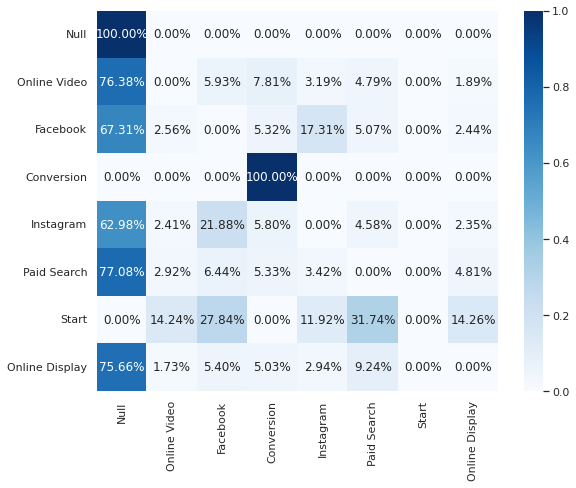

In [86]:
#sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
g = sns.heatmap(trans_matrix, annot=True, fmt='.2%', cmap="Blues")
g.figure.set_size_inches(9, 7) # 그래프의 크기를 키운다

# Markov Chain 을 통한 채널 기여도 분석 2

앞에서 구한 전이 행렬로 각 채널의 기여도를 구해보자

## 각 채널의 Removal Effect 제거 효과를 구해보자

In [87]:
trans_matrix

,Null,Online Video,Facebook,Conversion,Instagram,Paid Search,Start,Online Display
Null,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Online Video,0.763757,0.000000,0.059323,0.078146,0.031908,0.047947,0.0,0.018920
Facebook,0.673123,0.025577,0.000000,0.053220,0.173072,0.050655,0.0,0.024352
Conversion,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
Instagram,0.629786,0.024118,0.218777,0.057979,0.000000,0.045809,0.0,0.023531
Paid Search,0.770779,0.029221,0.064442,0.053309,0.034196,0.000000,0.0,0.048053
Start,0.000000,0.142361,0.278408,0.000000,0.119188,0.317399,0.0,0.142644
Online Display,0.756643,0.017299,0.053986,0.050324,0.029363,0.092386,0.0,0.000000


In [88]:
for channel in trans_matrix.columns:
  print(channel)

Null
Online Video
Facebook
Conversion
Instagram
Paid Search
Start
Online Display


In [89]:
trans_matrix.head()

,Null,Online Video,Facebook,Conversion,Instagram,Paid Search,Start,Online Display
Null,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Online Video,0.763757,0.000000,0.059323,0.078146,0.031908,0.047947,0.0,0.018920
Facebook,0.673123,0.025577,0.000000,0.053220,0.173072,0.050655,0.0,0.024352
Conversion,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
Instagram,0.629786,0.024118,0.218777,0.057979,0.000000,0.045809,0.0,0.023531


In [90]:
removal_effects_dict = {}
channels = [column for column in trans_matrix.columns if column not in ['Start',
                                                                  'Null',
                                                                  'Conversion']]

In [91]:
channels

['Online Video', 'Facebook', 'Instagram', 'Paid Search', 'Online Display']

Facebook 의 제거효과를 구해보자
- 목표: Facebook 으로 인한 전환이 다 없어졌다고 가정했을 때 전체 전환율을 구한다

- 1) Facebook 으로 인한 전환을 제거하는 일
- 2) 제거된 상태에서 전체 전환율을 다시 계산해보는 일 <- Absorbing Markov Chain 공식을 활용해 보려고 합니다

In [92]:
channel = 'Facebook'
removal_df = trans_matrix.drop(channel, axis=1).drop(channel, axis=0)

In [103]:
# 전이 확률를 행으로 다 더했을 때 1이 되기를 원합니다 
# 그것이 전이 확률 Matrix 에서의 정의 였죠!
removal_df

,Null,Online Video,Conversion,Instagram,Paid Search,Start,Online Display
Null,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Online Video,0.823080,0.000000,0.078146,0.031908,0.047947,0.0,0.018920
Conversion,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
Instagram,0.848563,0.024118,0.057979,0.000000,0.045809,0.0,0.023531
Paid Search,0.835221,0.029221,0.053309,0.034196,0.000000,0.0,0.048053
Start,0.278408,0.142361,0.000000,0.119188,0.317399,0.0,0.142644
Online Display,0.810628,0.017299,0.050324,0.029363,0.092386,0.0,0.000000


In [104]:
removal_df.columns

Index(['Null', 'Online Video', 'Conversion', 'Instagram', 'Paid Search',
       'Start', 'Online Display'],
      dtype='object')

In [95]:
# 행의 값을 다 더해줄게요!
column = 'Paid Search'
np.sum(list(removal_df.loc[column]))
# 지금은 1이 아닌 상태입니다

0.9355583070688879

In [106]:
# Facebook 으로 가던 전이 확률을 다 Null 로 가는 확률로 더해준다!
for column in removal_df.columns:

    # 각 전이행렬의 row 별 sum 을 구해서
    row_sum = np.sum(list(removal_df.loc[column]))

    # 1에서 빠진 부분만큼 Null 로 채워주자 
    null_pct = float(1) - row_sum
    print(column, row_sum, null_pct)
    if null_pct != 0:
        removal_df.loc[column]['Null'] = removal_df.loc[column]['Null'] + null_pct
    removal_df.loc['Null']['Null'] = 1.0

Null 1.0 0.0
Online Video 1.0 0.0
Conversion 1.0 0.0
Instagram 1.0 0.0
Paid Search 1.0 0.0
Start 1.0 0.0
Online Display 1.0 0.0


In [107]:
# 행의 값을 다 더해줄게요!
column = 'Paid Search'
print(list(removal_df.loc[column]))
np.sum(list(removal_df.loc[column]))
# 지금은 합쳐서 1이 된 상태 :) 

[0.835220621341738, 0.029221071589374155, 0.053309320126069336, 0.03419630796938316, 0.0, 0.0, 0.04805267897343539]


1.0

In [108]:
removal_df

,Null,Online Video,Conversion,Instagram,Paid Search,Start,Online Display
Null,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Online Video,0.823080,0.000000,0.078146,0.031908,0.047947,0.0,0.018920
Conversion,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
Instagram,0.848563,0.024118,0.057979,0.000000,0.045809,0.0,0.023531
Paid Search,0.835221,0.029221,0.053309,0.034196,0.000000,0.0,0.048053
Start,0.278408,0.142361,0.000000,0.119188,0.317399,0.0,0.142644
Online Display,0.810628,0.017299,0.050324,0.029363,0.092386,0.0,0.000000


In [99]:
# Absorbing Markov Chain 공식 하나를 이용해서
# 맨 처음에 Start 에서 시작해서 어떤 State 를 다 거치고 오더라도
# 결과적으로 Conversion으로 가는 확률값 = Facebook 을 제거했을 때 Start에서 시작한 최종적인 전환율

In [109]:
# Abosorbing States : Null or Conversion
# Transient States: 변화하는 States 나머지 Start,... Channel 


removal_to_conv = removal_df[
    ['Null', 'Conversion']].drop(['Null', 'Conversion'], axis=0)


removal_to_non_conv = removal_df.drop(
    ['Null', 'Conversion'], axis=1).drop(['Null', 'Conversion'], axis=0)

In [110]:
# Absorbing State
# null, conversion 만 있는 dataframe 
removal_to_conv # = R

,Null,Conversion
Online Video,0.823080,0.078146
Instagram,0.848563,0.057979
Paid Search,0.835221,0.053309
Start,0.278408,0.000000
Online Display,0.810628,0.050324


In [102]:
# null, conversion 을 제거한 dataframe 
removal_to_non_conv # = Q

,Online Video,Instagram,Paid Search,Start,Online Display
Online Video,0.000000,0.031908,0.047947,0.0,0.018920
Instagram,0.024118,0.000000,0.045809,0.0,0.023531
Paid Search,0.029221,0.034196,0.000000,0.0,0.048053
Start,0.142361,0.119188,0.317399,0.0,0.142644
Online Display,0.017299,0.029363,0.092386,0.0,0.000000


In [111]:
len(removal_to_non_conv.columns)

5

In [112]:
np.asarray(removal_to_non_conv)

array([[0.        , 0.03190762, 0.04794688, 0.        , 0.01891997],
       [0.02411758, 0.        , 0.04580924, 0.        , 0.02353131],
       [0.02922107, 0.03419631, 0.        , 0.        , 0.04805268],
       [0.14236094, 0.11918803, 0.31739884, 0.        , 0.14264414],
       [0.01729885, 0.02936344, 0.09238569, 0.        , 0.        ]])

Identity Matrix(단위 행렬): 단위행렬은 주대각선의 원소가 1이고, 나머지는 모두 0인 정사각행렬

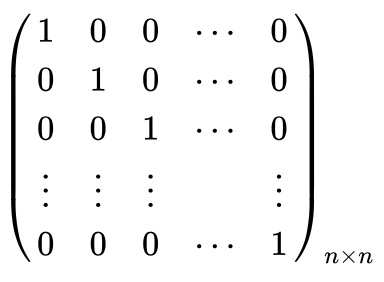

In [113]:
np.asarray(removal_to_non_conv)==np.array(removal_to_non_conv)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [114]:
I = np.identity(len(removal_to_non_conv.columns)) # non_conv 즉, Q와 관련된 Matrix
print(I)

Q = np.asarray(removal_to_non_conv)
print(Q)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0.         0.03190762 0.04794688 0.         0.01891997]
 [0.02411758 0.         0.04580924 0.         0.02353131]
 [0.02922107 0.03419631 0.         0.         0.04805268]
 [0.14236094 0.11918803 0.31739884 0.         0.14264414]
 [0.01729885 0.02936344 0.09238569 0.         0.        ]]


In [115]:
mat = I - Q
mat

array([[ 1.        , -0.03190762, -0.04794688,  0.        , -0.01891997],
       [-0.02411758,  1.        , -0.04580924,  0.        , -0.02353131],
       [-0.02922107, -0.03419631,  1.        ,  0.        , -0.04805268],
       [-0.14236094, -0.11918803, -0.31739884,  1.        , -0.14264414],
       [-0.01729885, -0.02936344, -0.09238569,  0.        ,  1.        ]])

In [116]:
# 역행렬을 구한다 
# F
removal_inv_diff = np.linalg.inv(mat)
F = np.linalg.inv(I - Q)
F

array([[1.00272629, 0.03441676, 0.05171129, 0.        , 0.02226629],
       [0.02610673, 1.00330901, 0.0496598 , 0.        , 0.0264894 ],
       [0.03120237, 0.03692335, 1.00779629, 0.        , 0.04988651],
       [0.15875911, 0.14097535, 0.34677051, 1.        , 0.16562845],
       [0.02099524, 0.03346716, 0.09545869, 0.        , 1.0057718 ]])

In [117]:
removal_inv_diff # = F

array([[1.00272629, 0.03441676, 0.05171129, 0.        , 0.02226629],
       [0.02610673, 1.00330901, 0.0496598 , 0.        , 0.0264894 ],
       [0.03120237, 0.03692335, 1.00779629, 0.        , 0.04988651],
       [0.15875911, 0.14097535, 0.34677051, 1.        , 0.16562845],
       [0.02099524, 0.03346716, 0.09545869, 0.        , 1.0057718 ]])

In [118]:
# 5*5 x 5*2 F X R

# 앞의 Matrix 는 흡수 상태를 고려하여 구한 고정된 Matrix 
# 뒤의 Matrix 는 각 채널에서 전환으로 가는 확률에 대한 Matrix
removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))

In [119]:
removal_dot_prod # 5 x 2

array([[0.91576868, 0.08423132],
       [0.93580842, 0.06419158],
       [0.93918547, 0.06081453],
       [0.95259886, 0.04740114],
       [0.9407157 , 0.0592843 ]])

In [120]:
removal_to_conv

,Null,Conversion
Online Video,0.823080,0.078146
Instagram,0.848563,0.057979
Paid Search,0.835221,0.053309
Start,0.278408,0.000000
Online Display,0.810628,0.050324


In [121]:
pd.DataFrame(removal_dot_prod, index=removal_to_conv.index, columns = removal_to_conv.columns)# [[1]]

# 0(Null ), 1

# 우리가 이 matrix, Dataframe 에서 알 수 있는 것은
# Start -> Conversion까지 가는 최종 Conversion rate: 0.047401 4.7%

,Null,Conversion
Online Video,0.915769,0.084231
Instagram,0.935808,0.064192
Paid Search,0.939185,0.060815
Start,0.952599,0.047401
Online Display,0.940716,0.059284


In [122]:
# Start -> Conversion 로 가는 확률, 즉 Facebook 제거 후 총 전환율을 가져온다.
removal_cvr = pd.DataFrame(removal_dot_prod,
                            index=removal_to_conv.index)[[1]].loc['Start'].values[0]

In [123]:
# Facebook 을 제거하니 Start -> Conversion, 즉 총 전환율은 다음과 같다.
removal_cvr

0.04740113808165116

In [124]:
# 원래의 전환율은 다음과 같았다.
base_conversion_rate

0.07346277508454528

In [125]:
# 전체 전환율 중 Facebook 을 제거한 전환율의 비중은 다음과 같다.
removal_cvr / base_conversion_rate

0.6452402325817279

In [126]:
# 아 전환율의 35%가 사라질 수 있겠구나! 
# (하지만 모든 채널의 효과를 구해서 다시 비중을 조정해야 한다.)
# removal_effect를 전부 다 합치면 100%가 넘기 때문에!
removal_effect = 1 - removal_cvr / base_conversion_rate
removal_effect

0.3547597674182721

모든 채널의 removal effect 를 구하자

In [128]:
# 각 컬럼에 대한 제거효과 구하기
# 함수로 한번에 만들기
def removal_effects(df, conversion_rate):
    removal_effects_dict = {}
    channels = [channel for channel in df.columns if channel not in ['Start',
                                                                     'Null',
                                                                     'Conversion']]
    for channel in channels:
        removal_df = df.drop(channel, axis=1).drop(channel, axis=0)
        for column in removal_df.columns:
            row_sum = np.sum(list(removal_df.loc[column]))
            null_pct = float(1) - row_sum
            if null_pct != 0:
                removal_df.loc[column]['Null'] = removal_df.loc[column]['Null'] + null_pct
            removal_df.loc['Null']['Null'] = 1.0

        removal_to_conv = removal_df[
            ['Null', 'Conversion']].drop(['Null', 'Conversion'], axis=0)
        removal_to_non_conv = removal_df.drop(
            ['Null', 'Conversion'], axis=1).drop(['Null', 'Conversion'], axis=0)

        removal_inv_diff = np.linalg.inv(
            np.identity(
                len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv))
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['Start'].values[0]
        removal_effect = 1 - removal_cvr / conversion_rate
        # removal_effects_dict
        removal_effects_dict[channel] = removal_effect

    return removal_effects_dict


removal_effects_dict = removal_effects(trans_matrix, base_conversion_rate)

In [129]:
removal_effects_dict

{'Facebook': 0.3547597674182721,
 'Instagram': 0.21731366149038445,
 'Online Display': 0.15435482356041275,
 'Online Video': 0.2069141165564219,
 'Paid Search': 0.3311037560086154}

전체 전환수에 대한 각 채널의 기여도를 구한다.

In [130]:
# 전체 확률을 다 더해준다.
re_sum = np.sum(list(removal_effects_dict.values()))
re_sum

1.2644461250341066

In [131]:
conversion_count

17639

In [132]:
removal_effects_dict

{'Facebook': 0.3547597674182721,
 'Instagram': 0.21731366149038445,
 'Online Display': 0.15435482356041275,
 'Online Video': 0.2069141165564219,
 'Paid Search': 0.3311037560086154}

In [133]:
removal_effects_dict.items()

dict_items([('Online Video', 0.2069141165564219), ('Facebook', 0.3547597674182721), ('Instagram', 0.21731366149038445), ('Paid Search', 0.3311037560086154), ('Online Display', 0.15435482356041275)])

In [134]:
re_sum

1.2644461250341066

In [135]:
for k, v in removal_effects_dict.items():

  # 앞에서 구한 확률을 전체 확률로 나누고, 총 전환수에 곱한다.
  # 의미: 각 제거 효과로 구한 확률의 비중만큼 전환에 대한 기여도를 재조정한다.
  print(k, (v / re_sum) * conversion_count)

Online Video 2886.4480895461475
Facebook 4948.892177847523
Instagram 3031.5215485558915
Paid Search 4618.891257291356
Online Display 2153.2469267590823


In [136]:
# 역시 함수로 정리하면?
def markov_chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))

    return {k: (v / re_sum) * total_conversions for k, v in removal_effects.items()}


attributions = markov_chain_allocations(removal_effects_dict, conversion_count)

In [137]:
attributions

{'Facebook': 4948.892177847523,
 'Instagram': 3031.5215485558915,
 'Online Display': 2153.2469267590823,
 'Online Video': 2886.4480895461475,
 'Paid Search': 4618.891257291356}

In [138]:
conversion_count

17639

In [139]:
sum(attributions.values())

17639.0

In [143]:
attribution_by_markov = pd.DataFrame({'channel': attributions.keys(), 'attribution': attributions.values()})
attribution_by_markov

,channel,attribution
0,Online Video,2886.448090
1,Facebook,4948.892178
2,Instagram,3031.521549
3,Paid Search,4618.891257
4,Online Display,2153.246927


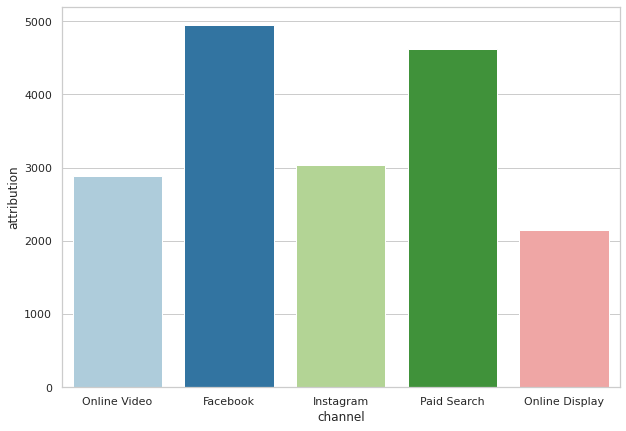

In [144]:
sns.set_theme(style="whitegrid", palette="Paired") # 테마를 설정한다
g = sns.barplot(x=attribution_by_markov.channel, y=attribution_by_markov.attribution, data = attribution_by_markov)
g.figure.set_size_inches(10, 7)

## 간단한 기여도 모델과 Markov Chain 모델로 구한 기여도 비교하기

In [145]:
attribution_by_markov["method"] = "markov"

In [146]:
# 앞에서 그래프 그릴 때 사용했던 데이터에 markov 모델도 더해준다.
total_with_markov = total_data.append(attribution_by_markov, ignore_index = True)

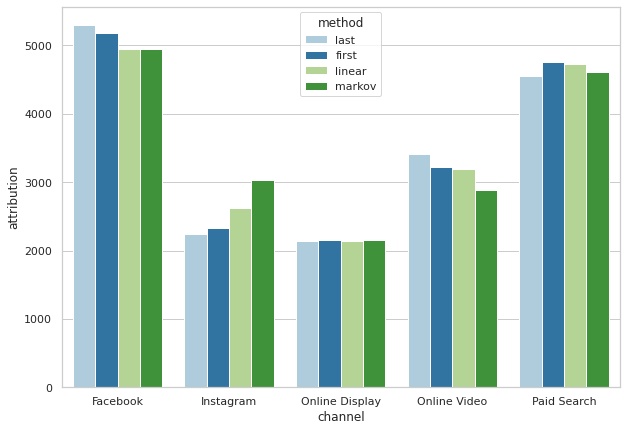

In [147]:
# 다른 모델에서 낮아보였던 Instagram의 기여도는 높아졌다.
sns.set_theme(style="whitegrid", palette="Paired") # 테마를 설정한다
g = sns.barplot(x=total_with_markov.channel, y=total_with_markov.attribution, hue = total_with_markov.method)
g.figure.set_size_inches(10, 7)